In [1]:
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load dataset
iris = datasets.load_iris()
features = pd.DataFrame(iris.data, columns=iris.feature_names);
features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
y = iris.target

In [4]:
unique_species = np.unique(y)
print(unique_species)

species_name = iris.target_names
print(species_name)

[0 1 2]
['setosa' 'versicolor' 'virginica']


In [5]:
species_dict = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [6]:
iris_df = features.assign(species = y)
iris_df['species_name'] = iris_df['species'].map(species_dict)
iris_df.drop('species', axis=1, inplace=True)

In [7]:
# Check for nulls
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species_name         0
dtype: int64

In [8]:
features.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


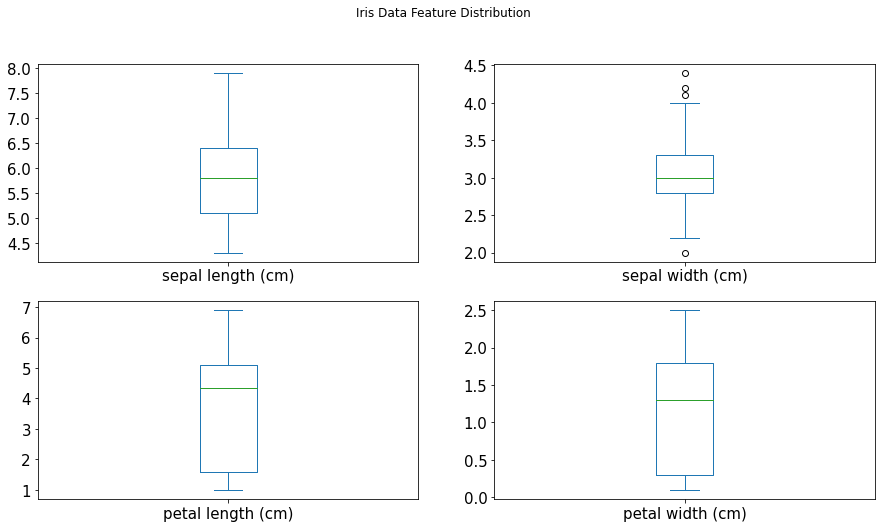

In [9]:
# Show the distribution for each column
features.plot(kind = 'box', figsize = (15,8), subplots = True, layout = (2, 2),  title = "Iris Data Feature Distribution", fontsize=15) ;

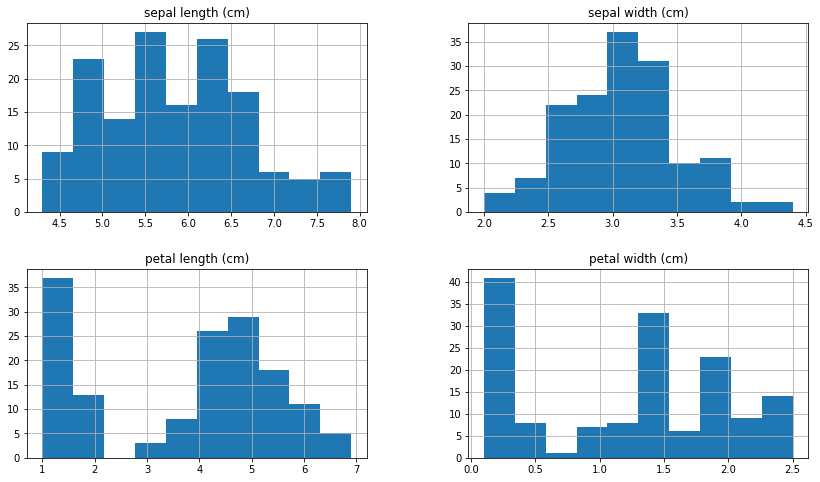

In [10]:
#distribution for each column
features.hist(figsize=(14,8));

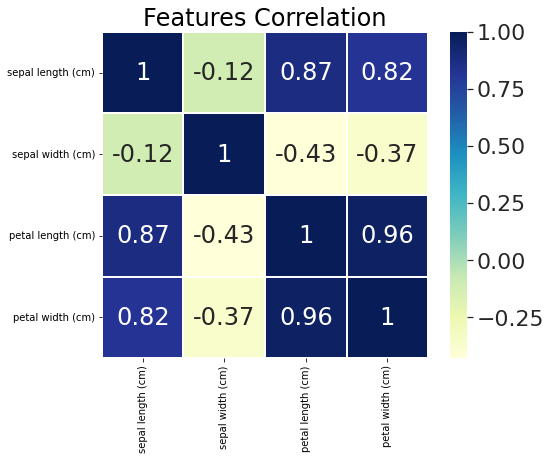

In [11]:
# correlation between features
fig, ax = plt.subplots(figsize=(8, 6));
sns.set(font_scale=2);

sns.heatmap(features.corr(), cmap = "YlGnBu", linecolor = 'white', linewidths = 1, annot= True, square = True).set(title='Features Correlation');

Decision Tree Classifier

In [12]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [13]:
X = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = iris_df['species_name']

In [14]:
#splitting data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [15]:
tree = DecisionTreeClassifier(max_depth = 3, random_state = 1)
tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [16]:
pred = tree.predict(x_test)
accuracy = metrics.accuracy_score(pred, y_test)
print("The accuracy of the Decision Tree is {:.2f}".format(accuracy))

The accuracy of the Decision Tree is 0.93


In [17]:
#features importance
tree.feature_importances_

array([0.      , 0.      , 0.041423, 0.958577])

RandomForestClassifier 

In [18]:
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [19]:
prediction = tree.predict(x_test)
accuracy = metrics.accuracy_score(prediction, y_test)
print("The accuracy is {:.2f}".format(accuracy))

The accuracy is 0.93
